# Week 4 Mini-Project 3: Breast Cancer Campaign

In [1]:
# Just to ignore warnings

import warnings
warnings.filterwarnings('ignore')

# 1. Reading the Dataset

Read the two previously read and preprocessed datasets into Pandas Data frames. \
Load the previously pre-processed dataset saved in the csv file “data_refined.csv” into a Pandas Data Frame. \
And \
Also load the following:
https://www.kaggle.com/mirichoi0218/insurance/download


In [2]:
import pandas as pd

df_data_refined = pd.read_csv('data_refined.csv') # read the data_refined dataset

df_insurance_original = pd.read_csv('insurance.csv') # read the insurance analysis dataset

In [3]:
# drop the unnamed:0 column

df_data_refined.drop(['Unnamed: 0'], axis = 1, inplace = True)
df_data_refined

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,1
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,1
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,1
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,1


In [4]:
df_insurance_original.groupby(['sex', 'smoker']).count()

age  bmi  children  region  charges
sex    smoker                                     
female no      547  547       547     547      547
       yes     115  115       115     115      115
male   no      517  517       517     517      517
       yes     159  159       159     159      159

# 2. Preprocessing

Perform any needed pre-processing on the chosen features including: \
Scaling. \
Encoding. \
Dealing with Nan values. \
Normalization.


In [5]:
# df_data_refined was saved encoded and scalled. No preprocessing is needed

# Perform preprocessing on df_insurance 

df_insurance = pd.get_dummies(data=df_insurance_original, drop_first=True) # Encode categorical columns
df_insurance.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [6]:
# Shift charges to the first column in the insurance dataset

first_column = df_insurance.pop('charges')

df_insurance.insert(0, 'charges', first_column)

# 3. Feature Selection

Look again at the features in both your datasets. Decide if some of the features should be dropped for better clustering.


In [7]:
corr_refined = df_data_refined.corr()

In [8]:
n = range(0,30)
best_features = []
best_feature_index = []

for i in n :
    if corr_refined.diagnosis.values[i] > 0.75 :
        best_features.append(corr_refined.diagnosis.values[i])
        best_feature_index.append(i) 
        print(i, "gives a correlation of:", corr_refined.diagnosis.values[i])
    
print('Highest correlation ', best_features)

print('Indecies of highest correlation ', best_feature_index)    

7 gives a correlation of: 0.7766138400204352
20 gives a correlation of: 0.77645377859504
22 gives a correlation of: 0.7829141371737594
27 gives a correlation of: 0.7935660171412696
Highest correlation  [0.7766138400204352, 0.77645377859504, 0.7829141371737594, 0.7935660171412696]
Indecies of highest correlation  [7, 20, 22, 27]


In [9]:
df_data_selected = df_data_refined.iloc[:,[7, 20, 22, 27]] # return the indeces names of the columns with the highest correlation with diagnosis

In [10]:
df_data_selected # selected refined cancer daraset with the highest correlation to diagnosis

,concave points_mean,radius_worst,perimeter_worst,concave points_worst
0,2.532475,1.886690,2.303601,2.296076
1,0.548144,1.805927,1.535126,1.087084
2,2.037231,1.511870,1.347475,1.955000
3,1.451707,-0.281464,-0.249939,2.175786
4,1.428493,1.298575,1.338539,0.729259
...,...,...,...,...
564,2.320965,1.901185,1.752563,1.629151
565,1.263669,1.536720,1.421940,0.733827
566,0.105777,0.561361,0.579001,0.414069
567,2.658866,1.961239,2.303601,2.289985


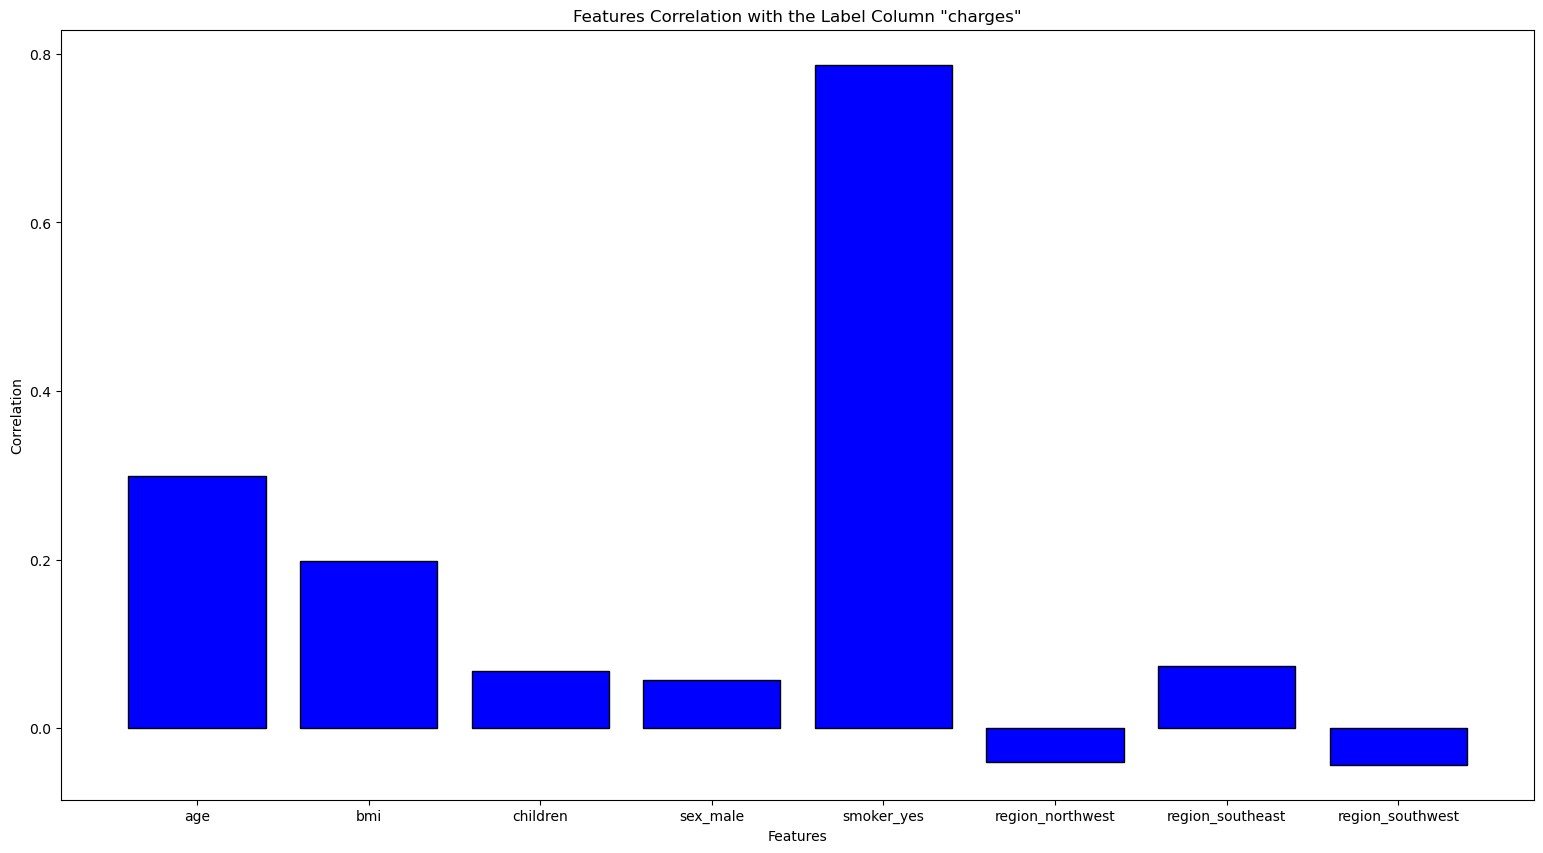

In [11]:
# Review correlation of the insurance dataset
corr = df_insurance.corr()

import matplotlib.pyplot as plt

plt.figure(figsize=(19, 10))

# Plot the correlation Matrix without the Charges column
plt.bar(corr.charges.index[1:9], corr.charges.values[1:9], color='blue', edgecolor='black')

plt.title('Features Correlation with the Label Column "charges"')
plt.xlabel('Features')
plt.ylabel('Correlation')


# Displaying the plot
plt.show()

# Clearly smokers, age and to a lesser degree bmi contribute to cancer charges the most

In [12]:
df_insurance_selected = df_insurance[['age', 'bmi', 'smoker_yes']]

df_insurance_selected

,age,bmi,smoker_yes
0,19,27.900,1
1,18,33.770,0
2,28,33.000,0
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,0
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


# 4. Clustering

Use k-means and Mean-shift to fit your data. \
Get optimal k for k-means using the elbow curve method. \
Try different bandwidth for the mean-shift clustering.


## k-means clustering

In [13]:
# I tried to use kprototupes to cluster both Kmeans for numerical data and kmodes for categorical data. 
# I wanted to to include the smoker feature as it has the highest correlation with charges

# selecting desired features from original dataset - without encoding
df_insurance_smoker = df_insurance_original[['age', 'bmi', 'smoker']]

X_insurance = df_insurance_smoker.values # keeping the smoker column

from kmodes.kprototypes import KPrototypes
modelKP = KPrototypes(n_clusters=5, verbose=2, max_iter=20).fit(X_insurance, categorical= 2)


# Running the model was successful and I was able to acquire the best run and cluster_centers

centres_insurance = modelKP.cluster_centroids_
print(centres_insurance)

# However, whenever I tried to predict the clusters I kept getting an error message "argument of type 'int' is not iterable"
pred = modelKP.predict(X_insurance, categorical = 2)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 338, ncost: 61320.59863837348
Run: 1, iteration: 2/20, moves: 127, ncost: 58991.23652242911
Run: 1, iteration: 3/20, moves: 84, ncost: 57964.131472395195
Run: 1, iteration: 4/20, moves: 59, ncost: 57318.727902420185
Run: 1, iteration: 5/20, moves: 48, ncost: 56980.984727638664
Run: 1, iteration: 6/20, moves: 18, ncost: 56919.020865590704
Run: 1, iteration: 7/20, moves: 15, ncost: 56859.05527619139
Run: 1, iteration: 8/20, moves: 21, ncost: 56733.16759155195
Run: 1, iteration: 9/20, moves: 17, ncost: 56658.896531034545
Run: 1, iteration: 10/20, moves: 22, ncost: 56559.492218867636
Run: 1, iteration: 11/20, moves: 22, ncost: 56445.789673366926
Run: 1, iteration: 12/20, moves: 19, ncost: 56397.53837367905
Run: 1, iteration: 13/20, moves: 5, ncost: 56392.13075933221
Run: 1, iteration: 14/20, moves: 4, nco

Run: 10, iteration: 6/20, moves: 12, ncost: 55393.75244117666
Run: 10, iteration: 7/20, moves: 17, ncost: 55305.93342281217
Run: 10, iteration: 8/20, moves: 13, ncost: 55276.3455407653
Run: 10, iteration: 9/20, moves: 5, ncost: 55267.79392834333
Run: 10, iteration: 10/20, moves: 0, ncost: 55267.79392834333
Best run was number 6
[['24.37065637065637' '24.966814671814657' 'no']
 ['57.18507462686567' '33.1235223880597' 'no']
 ['22.13235294117647' '35.067181372549015' 'no']
 ['46.232209737827716' '26.668127340823958' 'no']
 ['37.10989010989011' '33.66573260073258' 'no']]


TypeError: argument of type 'int' is not iterable

In [14]:
# Alternatively, create feature dataset without the smoker column because it doesn't contain continuous values

X_insurance = df_insurance_selected.iloc[:,0:2].values

X_insurance

array([[19.  , 27.9 ],
       [18.  , 33.77],
       [28.  , 33.  ],
       ...,
       [18.  , 36.85],
       [21.  , 25.8 ],
       [61.  , 29.07]])

In [15]:
# Scale data selected insurance features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_insurance_scaled = scaler.fit_transform(X_insurance)

In [16]:
from sklearn.cluster import KMeans

modelKM = KMeans(n_clusters=5, tol =0.01, random_state=0)

clusters_insurance = modelKM.fit_predict(X_insurance_scaled)
centres_insurance2 = modelKM.cluster_centers_
modelKM.inertia_

659.7624017221436

Text(0, 0.5, 'scalled bmi')

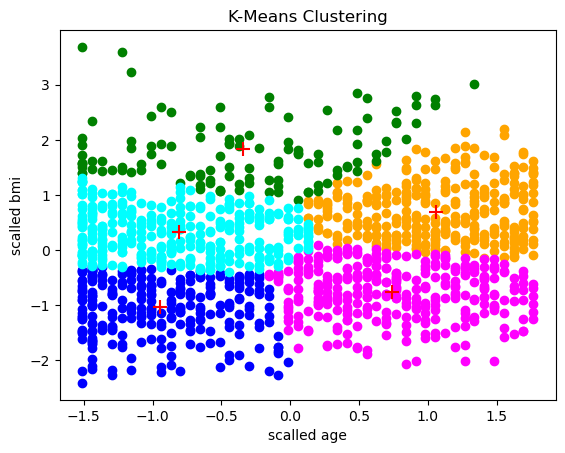

In [17]:
import matplotlib.pyplot as plt
colors = ['orange', 'blue', 'green', 'magenta', 'cyan']

for i in range(5):
    plt.scatter(X_insurance_scaled[clusters_insurance == i, 0], X_insurance_scaled[clusters_insurance == i, 1], c=colors[i])
plt.scatter(centres_insurance2[:, 0], centres_insurance2[:, 1], color='red', marker='+', s=100)
plt.title('K-Means Clustering')
plt.xlabel('scalled age')
plt.ylabel('scalled bmi')

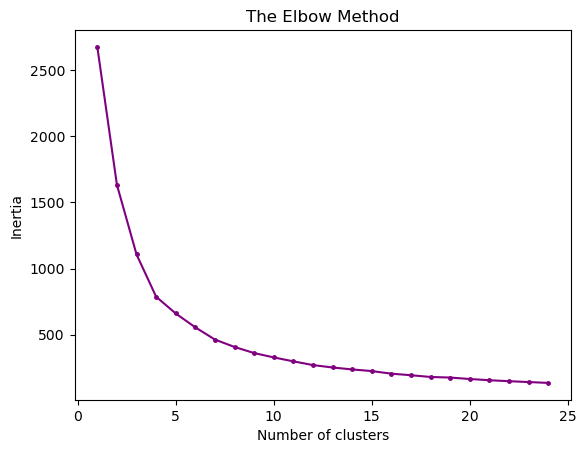

In [18]:
scores = []
cluster= range(1,25)

for i in cluster:
    modelKM = KMeans(n_clusters = i,  tol =0.01,random_state=0)
    modelKM.fit(X_insurance_scaled)
    scores.append(modelKM.inertia_)

plt.plot(cluster, scores, marker='.', markersize=5, color = 'purple')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia') # Model Inertia
plt.show()

In [19]:
# 7 clusters seems the best

modelKM = KMeans(n_clusters=7, tol =0.01, random_state=0)

clusters_insurance = modelKM.fit_predict(X_insurance_scaled)
centres_insurance2 = modelKM.cluster_centers_

modelKM.inertia_

462.3822423962637

Text(0, 0.5, 'scalled bmi')

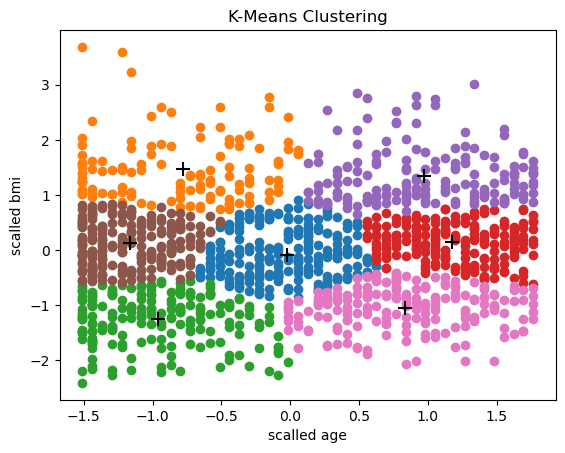

In [20]:
for i in range(7):
    plt.scatter(X_insurance_scaled[clusters_insurance == i, 0], X_insurance_scaled[clusters_insurance == i, 1], 
                cmap="rainbow")
plt.scatter(centres_insurance2[:, 0], centres_insurance2[:, 1], color='black', marker='+', s=100)
plt.title('K-Means Clustering')
plt.xlabel('scalled age')
plt.ylabel('scalled bmi')

## mean shift clustering

In [21]:
X_insurance = df_insurance_selected.iloc[:,0:3].values # taking smokers into consideration

# No scaling the data. When scalled the data no clusters are produced

X_insurance

array([[19.  , 27.9 ,  1.  ],
       [18.  , 33.77,  0.  ],
       [28.  , 33.  ,  0.  ],
       ...,
       [18.  , 36.85,  0.  ],
       [21.  , 25.8 ,  0.  ],
       [61.  , 29.07,  1.  ]])

In [22]:
from sklearn.cluster import MeanShift

bandwidth = 5

modelMS= MeanShift(bandwidth = bandwidth)

clusters_insurance_MS = modelMS.fit_predict(X_insurance)
centres_insurance_MS = modelMS.cluster_centers_

In [23]:
clusters_insurance_MS.max()

6

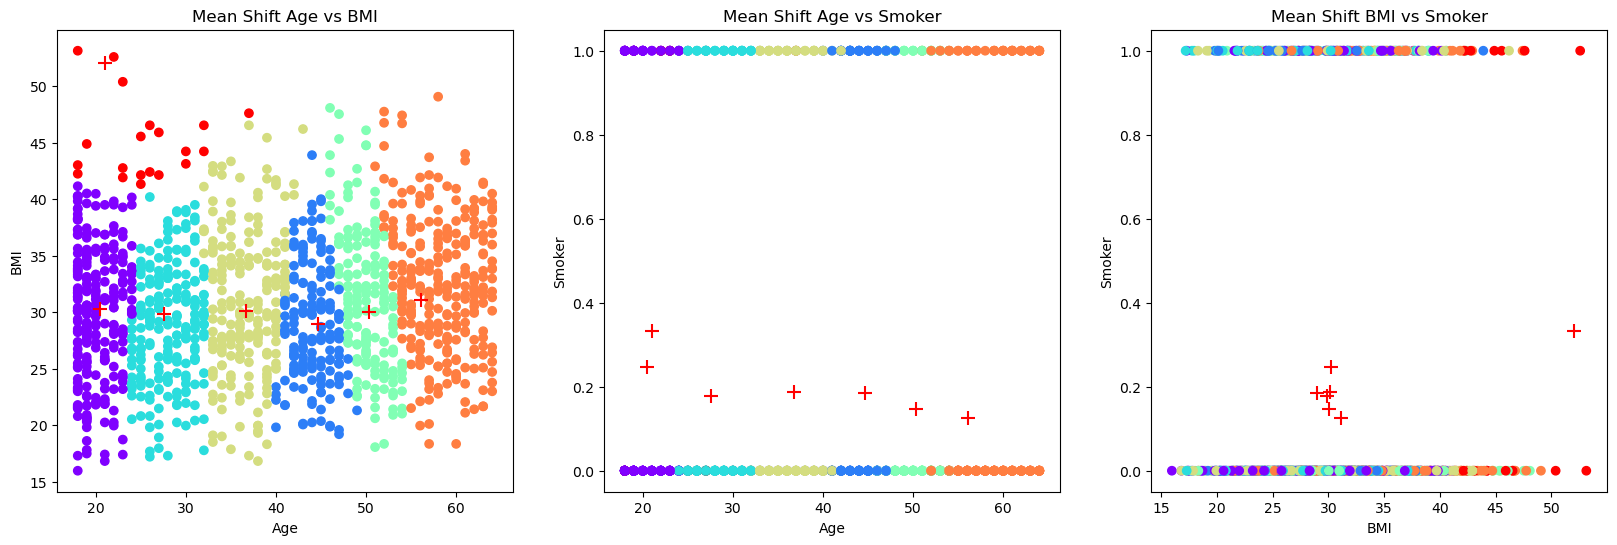

In [24]:
f, (ax1,ax2, ax3) = plt.subplots(nrows=1,ncols=3,figsize=(20,6))

ax1.set_title('Mean Shift Age vs BMI')
ax1.scatter(X_insurance[:, 0], X_insurance[:, 1], c=clusters_insurance_MS, cmap="rainbow")
ax1.scatter(centres_insurance_MS[:, 0], centres_insurance_MS[:, 1], color='red', marker='+', s=100)
ax1.set_xlabel('Age')
ax1.set_ylabel('BMI')

ax2.set_title('Mean Shift Age vs Smoker')
ax2.scatter(X_insurance[:, 0], X_insurance[:, 2], c=clusters_insurance_MS, cmap="rainbow")
ax2.scatter(centres_insurance_MS[:, 0], centres_insurance_MS[:, 2], color='red', marker='+', s=100)
ax2.set_xlabel('Age')
ax2.set_ylabel('Smoker')

ax3.set_title('Mean Shift BMI vs Smoker')
ax3.scatter(X_insurance[:, 1], X_insurance[:, 2], c=clusters_insurance_MS, cmap="rainbow")
ax3.scatter(centres_insurance_MS[:, 1], centres_insurance_MS[:, 2], color='red', marker='+', s=100)
ax3.set_xlabel('BMI')
ax3.set_ylabel('Smoker')

plt.show()

In [25]:
clusters_insurance_MS_max = []

for bandwidth in range(1,10):
    modelMS= MeanShift(bandwidth = bandwidth)
    clusters_insurance_MS = modelMS.fit_predict(X_insurance)
    clusters_insurance_MS_max.append(clusters_insurance_MS.max()+1)
    print(' bandwidth', bandwidth, 'number of clusters', clusters_insurance_MS.max()+1)
    

clusters_insurance_MS_max

 bandwidth 1 number of clusters 600
 bandwidth 2 number of clusters 121
 bandwidth 3 number of clusters 50
 bandwidth 4 number of clusters 26
 bandwidth 5 number of clusters 7
 bandwidth 6 number of clusters 6
 bandwidth 7 number of clusters 5
 bandwidth 8 number of clusters 3
 bandwidth 9 number of clusters 3


[600, 121, 50, 26, 7, 6, 5, 3, 3]

# Doing the same for the cancer data dataset

## Kmeans

In [26]:
X_data = df_data_selected.values

In [27]:
modelKM = KMeans(n_clusters=5, tol =0.01, random_state=0)

clusters_data = modelKM.fit_predict(X_data)
centres_data = modelKM.cluster_centers_
modelKM.inertia_

333.6834299654554

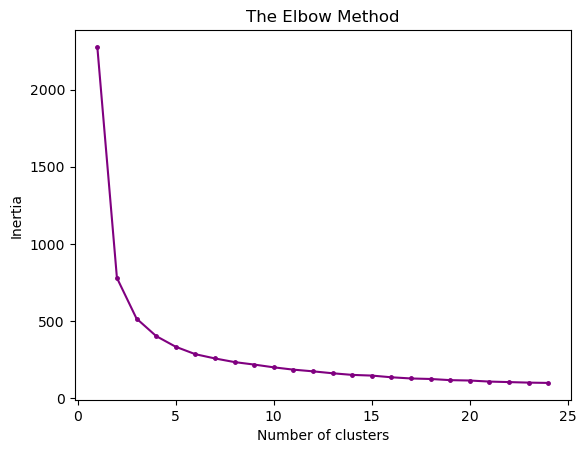

In [28]:
scores = []
cluster= range(1,25)

for i in cluster:
    modelKM = KMeans(n_clusters = i,  tol =0.01,random_state=0)
    modelKM.fit(X_data)
    scores.append(modelKM.inertia_)

plt.plot(cluster, scores, marker='.', markersize=5, color = 'purple')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia') # Model Inertia
plt.show()

In [29]:
# n_clusters = 5 appears to be the best

In [30]:
clusters_data

array([2, 3, 2, 0, 3, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 2, 0, 4, 1,
       3, 2, 2, 2, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 4, 4, 0, 4, 0, 2, 0,
       0, 3, 1, 0, 4, 0, 1, 4, 4, 3, 0, 4, 3, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 4, 4, 4, 3, 1, 3, 0, 4, 0, 4, 3, 2, 4, 4, 0, 2, 3, 4, 3, 0, 3,
       4, 0, 4, 0, 4, 4, 3, 3, 4, 1, 4, 0, 0, 1, 4, 4, 1, 0, 4, 4, 2, 4,
       1, 4, 0, 1, 1, 4, 1, 3, 3, 0, 4, 3, 2, 0, 4, 4, 0, 3, 0, 3, 4, 0,
       0, 0, 3, 4, 4, 4, 3, 4, 1, 0, 4, 4, 1, 4, 0, 4, 0, 4, 4, 1, 0, 1,
       4, 4, 3, 4, 4, 1, 4, 3, 2, 4, 2, 4, 1, 0, 3, 4, 4, 0, 3, 1, 1, 1,
       4, 3, 1, 1, 2, 2, 0, 1, 0, 1, 3, 4, 1, 1, 0, 4, 1, 0, 0, 4, 0, 0,
       3, 0, 4, 3, 2, 3, 4, 0, 1, 0, 0, 0, 3, 4, 2, 0, 0, 0, 4, 1, 3, 3,
       4, 4, 1, 0, 4, 0, 1, 0, 4, 0, 3, 1, 1, 3, 1, 4, 2, 3, 4, 3, 4, 1,
       4, 4, 3, 1, 4, 0, 1, 4, 2, 4, 3, 3, 3, 0, 2, 3, 3, 3, 3, 0, 3, 4,
       3, 2, 4, 4, 4, 4, 1, 4, 2, 1, 0, 4, 1, 0, 4, 4, 3, 4, 3, 3, 4, 1,
       4, 4, 4, 1, 0, 0, 4, 4, 4, 4, 1, 4, 4, 1, 2,

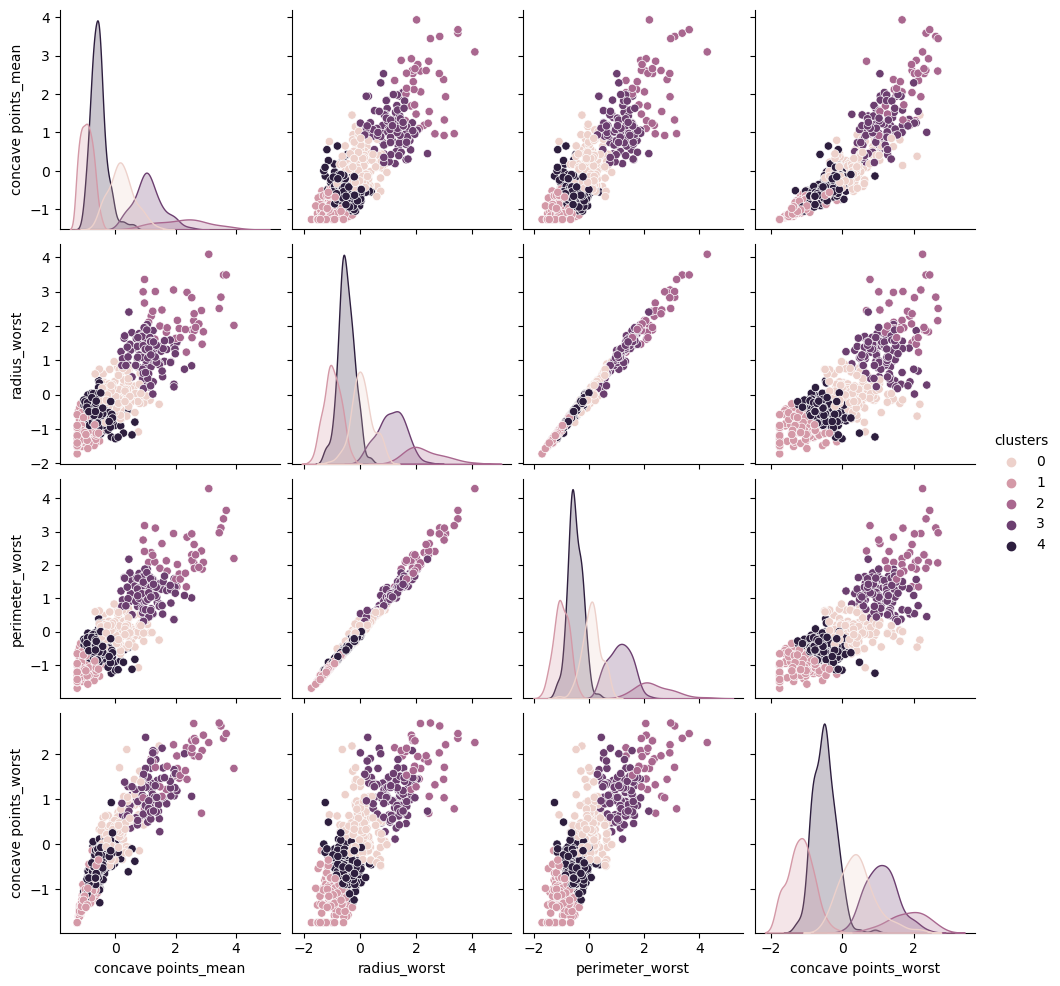

In [31]:
df_data_selected['clusters'] = clusters_data.tolist()

import seaborn as sn

sn.pairplot(df_data_selected, hue = "clusters")

## Mean Shift

In [32]:
bandwidth = 2

modelMS= MeanShift(bandwidth = bandwidth)

clusters_data_MS = modelMS.fit_predict(X_data)
centres_data_MS = modelMS.cluster_centers_

clusters_data_MS.max()

0

In [33]:
clusters_data_MS

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [34]:
clusters_data_MS_max = []

for bandwidth in range(1,10):
    modelMS= MeanShift(bandwidth = bandwidth)
    clusters_data_MS = modelMS.fit_predict(X_data)
    clusters_data_MS_max.append(clusters_data_MS.max()+1)
    print(' bandwidth', bandwidth, 'number of clusters', clusters_data_MS.max()+1)
    

clusters_data_MS_max

 bandwidth 1 number of clusters 7
 bandwidth 2 number of clusters 1
 bandwidth 3 number of clusters 1
 bandwidth 4 number of clusters 1
 bandwidth 5 number of clusters 1
 bandwidth 6 number of clusters 1
 bandwidth 7 number of clusters 1
 bandwidth 8 number of clusters 1
 bandwidth 9 number of clusters 1


[7, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
# highest number of clusters is with bandwidth = 1

# 5. Challenge yourself

Try a new clustering technique such as the DBSCAN clustering and answer the following question: \
Can DBSCAN be used to cluster datasets such as the ones used in this project? \
If yes, try to implement it on the Breast Cancer dataset.

In [35]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples = 3)
clusters_data_dbscan = dbscan.fit_predict(X_data)
clusters_data_dbscan.max(), clusters_data_dbscan.min()

(1, -1)

In [36]:
df_data_selected['clusters'] = clusters_data_dbscan.tolist()
df_data_selected.groupby(['clusters']).count()

,concave points_mean,radius_worst,perimeter_worst,concave points_worst
clusters,,,,
-1,34,34,34,34
0,8,8,8,8
1,527,527,527,527


In [37]:
dbscan = DBSCAN(eps=0.5, min_samples = 3)
clusters_insurance_dbscan = dbscan.fit_predict(X_insurance_scaled)
clusters_insurance_dbscan.max(), clusters_insurance_dbscan.min()

(1, 0)

In [38]:
df_insurance_selected['clusters'] = clusters_insurance_dbscan.tolist()
df_insurance_selected.groupby(['clusters']).count()

,age,bmi,smoker_yes
clusters,,,
0,1335,1335,1335
1,3,3,3


In [39]:
# DSCAN appears to be not suitable for the data in this activity. Data is very dense